In [36]:
import pandas as pd
import numpy as np

# read the data file from GitHub and convert to a NumPy ndarray object
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv" 
hflights = pd.read_csv(filename)
hflights

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0
5,2011,1,6,4,1359.0,1503.0,AA,428,N262AA,64.0,...,-7.0,-1.0,IAH,DFW,224,6.0,13.0,0,NaN,0
6,2011,1,7,5,1359.0,1509.0,AA,428,N493AA,70.0,...,-1.0,-1.0,IAH,DFW,224,12.0,15.0,0,NaN,0
7,2011,1,8,6,1355.0,1454.0,AA,428,N477AA,59.0,...,-16.0,-5.0,IAH,DFW,224,7.0,12.0,0,NaN,0
8,2011,1,9,7,1443.0,1554.0,AA,428,N476AA,71.0,...,44.0,43.0,IAH,DFW,224,8.0,22.0,0,NaN,0
9,2011,1,10,1,1443.0,1553.0,AA,428,N504AA,70.0,...,43.0,43.0,IAH,DFW,224,6.0,19.0,0,NaN,0


Ｑuestion3:
How many flights that the average ActualElapsedTime is beyond 240minutes?

Assume the aircompany plans to use this information to prove the airline meal for the flights which the 
average ActualElapsedTime is beyond 240minutes.

Narrative for transformations:

At first,remove some columns that we do not use in this question. 

To get the average ActualElapsedTime, we need to category each flights, and then we shouold get their mean of ActualElapsedTime.

In [38]:
#remove some columns that we do not use in this question.

hflights = hflights.drop(columns = ['DayOfWeek','UniqueCarrier','FlightNum','AirTime','Distance','TaxiIn','TaxiOut','CancellationCode','Diverted','ArrDelay','DepDelay','Origin','Dest','Cancelled'])
hflights

,Year,Month,DayofMonth,DepTime,ArrTime,TailNum,ActualElapsedTime
0,2011,1,1,1400.0,1500.0,N576AA,60.0
1,2011,1,2,1401.0,1501.0,N557AA,60.0
2,2011,1,3,1352.0,1502.0,N541AA,70.0
3,2011,1,4,1403.0,1513.0,N403AA,70.0
4,2011,1,5,1405.0,1507.0,N492AA,62.0
5,2011,1,6,1359.0,1503.0,N262AA,64.0
6,2011,1,7,1359.0,1509.0,N493AA,70.0
7,2011,1,8,1355.0,1454.0,N477AA,59.0
8,2011,1,9,1443.0,1554.0,N476AA,71.0
9,2011,1,10,1443.0,1553.0,N504AA,70.0


In [40]:
#retrieve the flights that the ActualElapsedTime is beyond 240 munites

beyond_flights = hflights[hflights['ActualElapsedTime'] >= 240]
beyond_flights

,Year,Month,DayofMonth,DepTime,ArrTime,TailNum,ActualElapsedTime
273,2011,1,1,1824.0,2106.0,N614AS,282.0
274,2011,1,2,1823.0,2103.0,N627AS,280.0
275,2011,1,3,1827.0,2107.0,N627AS,280.0
276,2011,1,4,1845.0,2132.0,N618AS,287.0
277,2011,1,5,1821.0,2109.0,N607AS,288.0
278,2011,1,6,1834.0,2133.0,N624AS,299.0
279,2011,1,7,1823.0,2118.0,N611AS,295.0
280,2011,1,8,1822.0,2112.0,N607AS,290.0
281,2011,1,9,1938.0,2228.0,N609AS,290.0
282,2011,1,10,1820.0,2159.0,N626AS,339.0


In [50]:
#after get the ActualElapsedTime, we should group by each flight and get the mean of ActualElapsedTime by different TailNum.

each_beyond_flights = beyond_flights.groupby('TailNum').mean()
each_beyond_flights

,Year,Month,DayofMonth,DepTime,ArrTime,ActualElapsedTime
TailNum,,,,,,
N11206,2011.0,1.000000,11.200000,1452.400000,1700.200000,263.800000
N12216,2011.0,1.000000,13.500000,1536.500000,1779.250000,262.750000
N12218,2011.0,1.000000,3.333333,2034.000000,1477.666667,257.000000
N12221,2011.0,1.000000,26.000000,791.000000,1033.000000,262.000000
N12225,2011.0,1.000000,11.000000,1687.000000,1919.500000,252.500000
N12238,2011.0,1.333333,23.666667,1471.666667,932.000000,273.666667
N13248,2011.0,1.000000,23.000000,938.000000,1212.000000,274.000000
N13716,2011.0,1.000000,12.000000,2123.000000,5.000000,282.000000
N13718,2011.0,1.000000,26.500000,2122.000000,2350.500000,268.500000


In [51]:
# count the flights number of each TailNum

each_beyond_flights.shape[0]

284

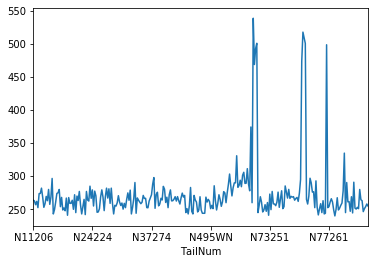

In [52]:
# create a plot graphic yo show the average ActualElapsedTime of each flights  

each_beyond_flights.ActualElapsedTime.plot()

In [56]:
# get descriptive statistics for a DataFrame column

each_beyond_flights['ActualElapsedTime'].describe()

count    284.000000
mean     272.661173
std       44.514400
min      240.000000
25%      254.000000
50%      263.666667
75%      274.850000
max      539.000000
Name: ActualElapsedTime, dtype: float64